IMPORT DES LIBRAIRIES ET DU DATA SET 

In [1]:
# import des librairies dont nous aurons besoin
import pandas as pd
import pprint
import numpy as np
import re
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sms
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate


# chargement et affichage des données
data = pd.read_csv('dataset.csv')
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [2]:
X= data.drop(columns=['charges'],axis=1)
y= data[['charges']]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.15, random_state=42, stratify= data['smoker'])

Ce code construit un prétraitement qui normalise et encode les données. La fonction ColumnTransformer applique un traitement différent sur chaque colonne. La fonction RobustScaler normalise les colonnes age, bmi et children et la fonction OneHotEncoder encode en étiquettes les colonnes région, fumeur et sexe. Ensuite, le Pipeline rassemble toutes les étapes de prétraitement et applique les transformations à l'ensemble de données X_train et y_train

In [4]:
cols_to_norm = ['age', 'bmi','children']
col_cat = ['region','smoker','sex']
scale_one_hot = ColumnTransformer(
    [('scaler',  RobustScaler(), cols_to_norm),('one_hot_encoder', OneHotEncoder(), col_cat)]
    
)

preprocessor = Pipeline([
    ('normalizer', scale_one_hot)
    # autres étapes de votre pipeline ici
])
# Transformation des données

preprocessor.fit_transform(X_train, y_train)


array([[-0.64      ,  1.04964115,  0.5       , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.12      ,  1.1812201 ,  0.5       , ...,  1.        ,
         1.        ,  0.        ],
       [-0.44      , -0.73863636,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.28      ,  0.81818182,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.24      , -0.22667464,  0.5       , ...,  0.        ,
         1.        ,  0.        ],
       [-0.76      ,  0.17045455, -0.5       , ...,  0.        ,
         1.        ,  0.        ]])

### Modele de machine learning 

### Regression Lineaire

In [5]:
my_pipe_lr = make_pipeline(preprocessor, PolynomialFeatures(degree=2), LinearRegression())
my_pipe_lr.fit(X_train, y_train)
pipe_lr = cross_validate(my_pipe_lr, X_train, y_train, cv=5, scoring= ['r2', 'neg_root_mean_squared_error'])


In [6]:
score_lr = pipe_lr['test_r2'].mean()
rmse_lr = np.abs(pipe_lr['test_neg_root_mean_squared_error'].mean())
score_lr


0.8311306969313235

In [7]:
rmse_lr

4932.029695943878

### LASSO

In [8]:
my_pipe_Lasso = make_pipeline(preprocessor, PolynomialFeatures(degree=2), Lasso())
my_pipe_Lasso.fit(X_train, y_train)
cv_lasso = cross_validate(my_pipe_Lasso, X_train, y_train, cv=5, scoring= ['r2', 'neg_root_mean_squared_error'])

/home/yanis/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.331e+08, tolerance: 1.666e+07
  model = cd_fast.enet_coordinate_descent(
/home/yanis/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.091e+08, tolerance: 1.329e+07
  model = cd_fast.enet_coordinate_descent(
/home/yanis/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the 

In [9]:
score_lasso = cv_lasso['test_r2'].mean()
rmse_lasso = np.abs(cv_lasso['test_neg_root_mean_squared_error'].mean())
score_lasso

0.8317130854915332

In [10]:
rmse_lasso

4923.75079859429

In [11]:
my_pipe_Lasso.get_params()

{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('normalizer',
                    ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                     ['age', 'bmi', 'children']),
                                                    ('one_hot_encoder',
                                                     OneHotEncoder(),
                                                     ['region', 'smoker',
                                                      'sex'])]))])),
  ('polynomialfeatures', PolynomialFeatures()),
  ('lasso', Lasso())],
 'verbose': False,
 'pipeline': Pipeline(steps=[('normalizer',
                  ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                   ['age', 'bmi', 'children']),
                                                  ('one_hot_encoder',
                                                   OneHotEncoder(),
                                                   ['

## RIDGE 

In [12]:
my_pipe_ridge = make_pipeline(preprocessor, PolynomialFeatures(degree=2),Ridge())
my_pipe_ridge.fit(X_train, y_train)
cv2= cross_validate(my_pipe_ridge, X_train, y_train, cv=5, scoring= ['r2', 'neg_root_mean_squared_error'])

In [13]:
score_ridge = cv2['test_r2'].mean()
rmse_ridge = np.abs(cv2['test_neg_root_mean_squared_error'].mean())
score_ridge

0.8317464379297779

In [14]:
rmse_ridge

4923.720607721733

In [15]:
my_pipe_ridge.get_params()

{'memory': None,
 'steps': [('pipeline', Pipeline(steps=[('normalizer',
                    ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                     ['age', 'bmi', 'children']),
                                                    ('one_hot_encoder',
                                                     OneHotEncoder(),
                                                     ['region', 'smoker',
                                                      'sex'])]))])),
  ('polynomialfeatures', PolynomialFeatures()),
  ('ridge', Ridge())],
 'verbose': False,
 'pipeline': Pipeline(steps=[('normalizer',
                  ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                   ['age', 'bmi', 'children']),
                                                  ('one_hot_encoder',
                                                   OneHotEncoder(),
                                                   ['

###### Ce code recherche les meilleurs hyperparamètres pour un modèle de régression linéaire Ridge en utilisant GridSearchCV. GridSearchCV est une fonction d'optimisation qui permet d'explorer un espace de recherche des hyperparamètres afin de trouver les meilleurs paramètres pour le modèle. Le code crée un objet GridSearchCV qui prend en entrée une pipeline et un jeu d'hyperparamètres, puis entraîne le modèle en utilisant les données d'entraînement. Une fois l'entraînement terminé, GridSearchCV retourne le meilleur jeu d'hyperparamètres pour le modèle, ainsi que le score le plus élevé obtenu avec ce jeu d'hyperparamètres. Enfin, le code met à jour le modèle avec les meilleurs hyperparamètres trouvés.

In [16]:
hyperparametres = {'ridge__alpha': [0.01,0.1, 0.2,0.5, 1,10]}
random_search = RandomizedSearchCV(my_pipe_ridge, hyperparametres, cv=5, n_iter=3)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_

grid_search = GridSearchCV(my_pipe_ridge, hyperparametres, cv= 5)
grid_search.fit(X_train,y_train)


my_pipe_ridge.set_params(**grid_search.best_params_)
ridge_score = grid_search.best_score_
ridge_score

0.8323599209528769

## ELASTIC NET

In [17]:
my_pipe_elastic_net = make_pipeline(preprocessor, PolynomialFeatures(degree=2), ElasticNet(max_iter= 100, random_state=42))

my_pipe_elastic_net.fit(X_train, y_train)
cv_enet = cross_validate(my_pipe_elastic_net, X_train, y_train, cv=5, scoring= ['r2', 'neg_root_mean_squared_error'])


In [18]:
param_grid = {'elasticnet__alpha':[0.1,0.9,10],
              'elasticnet__l1_ratio':[0.0,1.0,0.1]}

grid = GridSearchCV(my_pipe_elastic_net, param_grid, cv = 5, scoring = 'r2')
grid.fit(X_train, y_train)
my_pipe_elastic_net.set_params(**grid.best_params_)


/home/yanis/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.827e+10, tolerance: 1.329e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/yanis/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.818e+10, tolerance: 1.334e+07 Linear regression models with null weight for the l1 regularization term are more efficientl

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('normalizer',
                                  ColumnTransformer(transformers=[('scaler',
                                                                   RobustScaler(),
                                                                   ['age',
                                                                    'bmi',
                                                                    'children']),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder(),
                                                                   ['region',
                                                                    'smoker',
                                                                    'sex'])]))])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('elasticnet',
                 ElasticNet(alpha=10, l1_ratio=1.0, max_iter=100,
                            random_state=42))])

In [19]:
print("Meilleurs hyperparametres : ", grid.best_params_)
print("Meilleur score : ", grid.best_score_)

Meilleurs hyperparametres :  {'elasticnet__alpha': 10, 'elasticnet__l1_ratio': 1.0}
Meilleur score :  0.832845492384848


In [20]:
elastic_score = grid.best_score_ 
elastic_score

0.832845492384848

## Calcul des residuals Elastic net 

In [21]:
y_pred_enet = my_pipe_elastic_net.predict(X_train)
y_pred_enet = y_pred_enet.reshape(1137,1)
y_pred_enet

array([[ 8583.32368327],
       [30357.83881528],
       [ 8027.43646846],
       ...,
       [10374.2375199 ],
       [11078.61595962],
       [ 7034.75457596]])

In [22]:
residual_enet = (y_pred_enet-y_train).abs()
residual_enet

,charges
699,5082.711383
1323,13538.537485
468,15261.491932
170,2036.320312
376,999.771942
...,...
627,949.617443
76,4314.517161
319,5706.629870
197,2561.786960


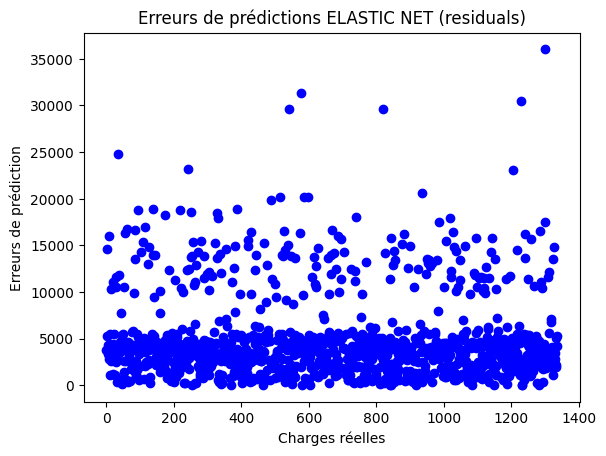

In [23]:
#plot residuals POUR ELASTIC NET 

plt.scatter(y_train.index, residual_enet , color="blue")
plt.title("Erreurs de prédictions ELASTIC NET (residuals)")
plt.xlabel("Charges réelles")
plt.ylabel("Erreurs de prédiction")
plt.show()

In [24]:
# Filter the residuals greater than 20000 
residual_to_drop = residual_enet[residual_enet['charges'] > 15000].index

# Recreate the X_train and y_train
X_train_new_enet = X_train.drop(residual_to_drop)
y_train_new_enet = y_train.drop(residual_to_drop)


# # Retrain the model with new data 
my_pipe_lr.fit(X_train_new_enet, y_train_new_enet)


# # Predict on new data
scores_enet_sans_erreur = cross_val_score(my_pipe_lr, X_train_new_enet, y_train_new_enet, cv=5).mean()
print ("my_pipe_e_net score : " , scores_enet_sans_erreur )
#y_pred2 = my_pipe_lr.predict(X_train_new)

my_pipe_e_net score :  0.8691331881270381


## Calcul des residuals My pipe lr 

### 
Ce code prédit la variable cible d'un jeu de données d'entraînement X_train en utilisant un pipeline d'apprentissage automatique appelé my_pipe_lr. Le code produit une matrice contenant les prédictions pour chaque élément du jeu de données d'entraînement.

In [25]:
y_pred = my_pipe_lr.predict(X_train)
#y_pred.reshape(1,1070)
y_pred

array([[ 3380.],
       [44666.],
       [ 5826.],
       ...,
       [ 6922.],
       [10204.],
       [ 3194.]])

### Ce code calcule les résidus entre les valeurs prédites et les valeurs réelles pour le jeu de données d'entraînement. Il trie ensuite les résidus par charges, de la plus grande à la plus petite.

In [26]:
residual = (y_pred-y_train).abs()
residual

,charges
699,120.61230
1323,769.62370
468,17462.92840
170,1804.60970
376,3354.06990
...,...
627,6628.71487
76,1188.58690
319,2254.39235
197,1687.17100


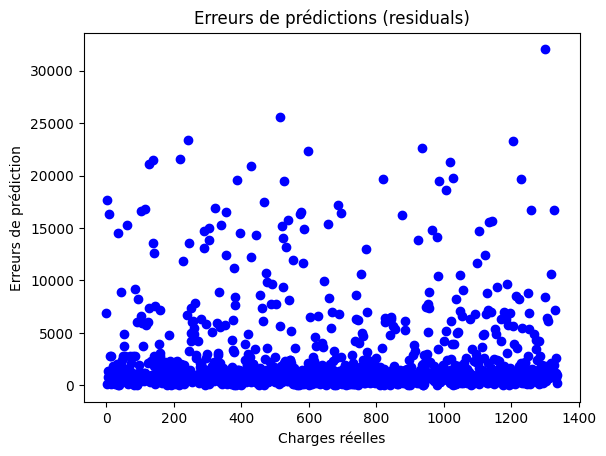

In [27]:
#plot residuals

plt.scatter(y_train.index, residual, color="blue")
plt.title("Erreurs de prédictions (residuals)")
plt.xlabel("Charges réelles")
plt.ylabel("Erreurs de prédiction")
plt.show()

In [28]:
# Filter the residuals greater than 20000 
residual_to_drop = residual[residual['charges'] > 15000].index

# Recreate the X_train and y_train
X_train_new=X_train.drop(residual_to_drop)
y_train_new=y_train.drop(residual_to_drop)


# # Retrain the model with new data 
my_pipe_lr.fit(X_train_new, y_train_new)


# # Predict on new data
scores_lr_sans_erreur = cross_val_score(my_pipe_lr, X_train_new, y_train_new, cv=5).mean()
print ("my_pipe_lr score : " , scores_lr_sans_erreur )
#y_pred2 = my_pipe_lr.predict(X_train_new)

my_pipe_lr score :  0.9122861757431115


DISTANCE DE COOK 

In [29]:
import statsmodels.api as sm

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42, stratify=X[['smoker']])
cols_to_norm = ['age', 'bmi','children']
col_cat = ['region','smoker','sex']
scale_one_hot = ColumnTransformer(
    [('scaler',  RobustScaler(), cols_to_norm),('one_hot_encoder', OneHotEncoder(), col_cat)]
    
)

preprocessor = Pipeline([
    ('normalizer', scale_one_hot)
    # autres étapes de votre pipeline ici
])
# Transformation des données

preprocessor.fit_transform(X_train, y_train)

array([[-0.56565657, -0.45247206,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.08080808,  0.3257309 ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.84848485,  0.77820297, -0.5       , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.28282828,  0.83759375,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.24242424, -0.23205266,  0.5       , ...,  0.        ,
         1.        ,  0.        ],
       [-0.76767677,  0.1744987 , -0.5       , ...,  0.        ,
         1.        ,  0.        ]])

In [31]:
def get_index_to_remove_by_Cooks_Distance(X_train, y_train, preprocessor):
    """
    This function removes observations from the training data that have high Cook's distance values.
    Cook's distance is a measure of the influence of an observation on a statistical model.
    Observations with high Cook's distance values may have a disproportionate influence on the model,
    and removing them can improve the model's accuracy.
    
    Parameters:
    - X_train: pd.DataFrame
        The training data
    - y_train: pd.Series
        The target labels for the training data
    - preprocessor: sklearn.compose.ColumnTransformer
        The preprocessor created by make_pipeline_to_ML()
        
    Returns:
    - index_to_be_removed: pd.Index
        The indices of the observations to be removed from the training data
    """
    
    # Fit the transformer to the training data
    preprocessor.fit(X_train)
    
    # Transform the training data using the preprocessor
    X_test_pipe = preprocessor.transform(X_train)
    
    # Get the names of the columns added by the OneHotEncoder
    new_columns = preprocessor.get_feature_names_out()
    new_columns = [w.replace('pipeline-1__', '') for w in new_columns]
    new_columns = [w.replace('pipeline-2__', '') for w in new_columns]
    
    # Convert the transformed data to a Pandas DataFrame
    newdf = pd.DataFrame(X_test_pipe)
    
    # Set the column names to the names obtained from the OneHotEncoder
    newdf.columns = new_columns
    
    # Add a constant term to the DataFrame
    X = sm.add_constant(newdf)
    
    # Set the index of the DataFrame to the index of the target labels
    X = X.set_index(y_train.index)
    
    # Fit an OLS model to the data
    estimation = sm.OLS(y_train, X_test_pipe).fit()
    
    # Calculate the Cook's distance values for each observation
    influence = estimation.get_influence().cooks_distance[0]
    
    # Add the Cook's distance values to the DataFrame as a new column
    X['dcooks'] = influence
    
    # Calculate the threshold for Cook's distance values
    n = X.shape[0]
    p = X.shape[1]
    seuil_dcook = 4/(n-p)
    
    # Select the indices of the observations with Cook's distance values above the threshold
    index_to_be_removed = X[X['dcooks']>seuil_dcook].index
    
    plt.figure(figsize=(10,6))
    plt.bar(X.index, X['dcooks'])
    plt.xticks(np.arange(0, len(X), step=int(len(X)/10)))
    plt.xlabel('Observation')
    plt.ylabel('Cooks Distance')
    #Plot the line
    plt.hlines(seuil_dcook, xmin=0, xmax=len(X_train), color='r')
    plt.show()


    # Return the indices of the observations to be removed
    return index_to_be_removed

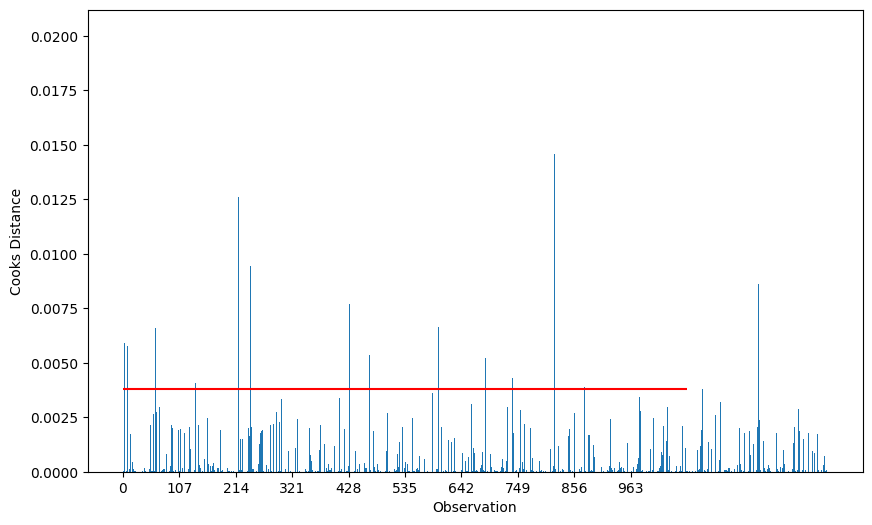

In [32]:
# Get the indices of the observations to be removed from the training data
index_to_be_removed = get_index_to_remove_by_Cooks_Distance(X_train=X_train, y_train=y_train, preprocessor=preprocessor)

# Remove the observations from the training data
X_train = X_train.drop(index=index_to_be_removed.values)
y_train = y_train.drop(index=index_to_be_removed.values)

In [33]:
my_pipe_lr.fit(X_train, y_train)
pipe_lr = cross_validate(my_pipe_lr, X_train, y_train, cv=5, scoring= ['r2', 'neg_root_mean_squared_error'])

In [34]:
score_lr = pipe_lr['test_r2'].mean()
rmse_lr = np.abs(pipe_lr['test_neg_root_mean_squared_error'].mean())
score_lr

0.9055086913790028

SELECTION DU MODELE FINAL

In [35]:
# créer un dictionnaire avec les scores de chaque modèle
modeles = {"score_lr": score_lr, "score_lasso": score_lasso, "score_ridge": score_ridge, "elastic_score": elastic_score,"scores_lr_sans_erreur": scores_lr_sans_erreur, "scores_enet_sans_erreur": scores_enet_sans_erreur}

# trier le dictionnaire en utilisant la méthode sorted
sorted_dict = sorted(modeles.items(), key=lambda x: x[1])


# imprimer le dictionnaire trié
for modèle, score in sorted_dict:
    print(modèle, score)

score_lasso 0.8317130854915332
score_ridge 0.8317464379297779
elastic_score 0.832845492384848
scores_enet_sans_erreur 0.8691331881270381
score_lr 0.9055086913790028
scores_lr_sans_erreur 0.9122861757431115


In [36]:
print ("my_pipe_lr score : " , my_pipe_lr.score(X_test, y_test))

my_pipe_lr score :  0.8569915568364621


## Enregistrer le modèle 

In [37]:
import pickle 

In [38]:
pickle_out = open("my_pipe_lr.pkl", "wb") 
pickle.dump(my_pipe_lr, pickle_out) 
pickle_out.close()